<a href="https://colab.research.google.com/github/CarlosGatti/python-finance/blob/main/MC_Predicting_Stock_Prices_Part_III_Solution_Yahoo_Py3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Monte Carlo - Forecasting Stock Prices

In [3]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

ticker = 'MSFT' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2021-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())
u = log_returns.mean()
var = log_returns.var()
drift = u - (0.5 * var)
stdev = log_returns.std()

drift.values
stdev.values

t_intervals = 250
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [15]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

***

Create a variable S0 equal to the last adjusted closing price of Microsoft. Use the “iloc” method.

In [ ]:
S0 = data.iloc[-1]
S0

MSFT    213.743393
Name: 2021-01-15 00:00:00, dtype: float64

Create a variable price_list with the same dimension as the daily_returns matrix. 

In [ ]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Set the values on the first row of the price_list array equal to S0.

In [ ]:
price_list[0] = S0
price_list

array([[213.74339294, 213.74339294, 213.74339294, ..., 213.74339294,
        213.74339294, 213.74339294],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Create a loop in the range (1, t_intervals) that reassigns to the price in time t the product of the price in day (t-1) with the value of the daily returns in t.

In [ ]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [ ]:
price_list

array([[213.75      , 213.75      , 213.75      , ..., 213.75      ,
        213.75      , 213.75      ],
       [204.91240121, 215.44804824, 214.7770102 , ..., 207.42723437,
        217.77874918, 218.17826284],
       [199.73055735, 211.52139266, 219.27414256, ..., 210.53561083,
        215.79156818, 212.50487283],
       ...,
       [215.68995749, 248.75982658, 122.49743377, ..., 133.96045491,
        177.91745561, 215.23345746],
       [213.66597763, 244.91678773, 124.85394049, ..., 131.06409469,
        181.43769186, 210.5693979 ],
       [211.39657796, 250.93093144, 127.97661176, ..., 134.43778325,
        182.49299832, 212.87822673]])

Finally, plot the obtained price list data.

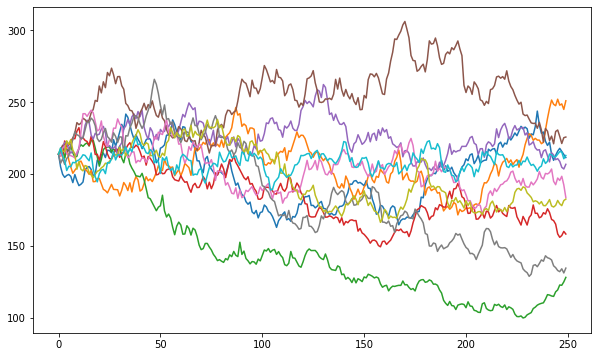

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(price_list);